# Web crawling and analysis

## Spiders

### Basic crawlers

1. Take URL from queue
2. Fetch and parse page
3. Extract URLs from page
4. Add URLs to queue
5. Call the indexer to index the page

BFS in essence

#### Cons of a simple crawler
1. Be polite and space out requests over a longer period of time
2. Need to select only the important parts, cannot index everything. eg. dont index the comments section
3. Need to crawl periodically and prioritise
4. Need to be able to identify duplicates
5. Scalability
6. Prone to spider traps and spams

### Sample Robots.txt

```
User-agent: *
    Disallow: /yoursite/temp/
User-agent: searchengine
    Disallow:/
```

Give crawlers limited access to your website

### Spider traps
Links that cause the spider to go into an infinite loop, constantly indexing the same page or redirect to another page.


## Link analysis

Take web pages as directed graphs

### Anchor text

- Take anchor text as a better description of a page's content.
- Citations can also be considered especially for academic networks.

### Page rank

Importance of a webpage is defined by the importance of the webpages that leads to this  
  
Assumptions:
- A link to the web is a quality signal
- The anchor text describes the content of the linked page

#### Teleporting
Give a probability of teleporting to a random webpage not linked to it at each step, `alpha`.
Remaining probability to follow a random link on the page.

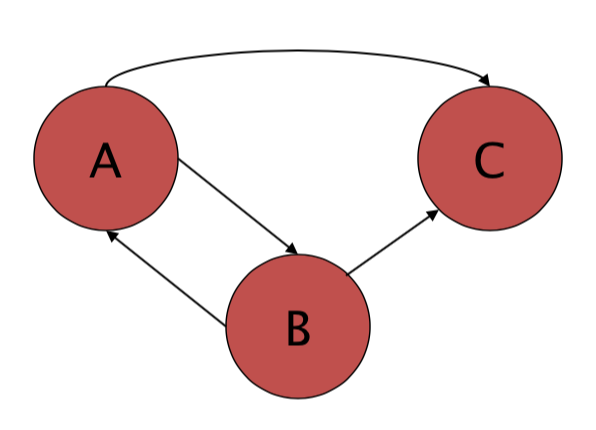
Probability matrix without teleportation

|   	| A   	| B   	| C   	|
|---	|-----	|-----	|-----	|
| A 	| 0   	| 1/2 	| 1/2 	|
| B 	| 1/2 	| 0   	| 1/2 	|
| C 	| 0   	| 0   	| 1   	|


Probability matrix with 10% teleportation 90% random walk

|   	| A             	| B             	| C             	|
|---	|---------------	|---------------	|---------------	|
| A 	| 1/30          	| 0.9(1/2)+1/30 	| 0.9(1/2)+1/30 	|
| B 	| 0.9(1/2)+1/30 	| 1/30          	| 0.9(1/2)+1/30 	|
| C 	| 1/30          	| 1/30          	| 0.9(1)+1/30   	|

A -> A is 1/30 because of 1/3 probability of going to any vertex and 0.1 probability of doing so == `0.1*1/3`  
A -> B is `0.9(1/2)+1/30` because `0.9(1/2)` chance of going to either B or C and `1/30` chance of teleporting without walking


### Some tips

- Most dominant node is one with many incoming edges, increase more incoming edges to favour it more **It can be calculated using pageRank and that node in matrix X will have the highest score**  
Self loops for the node itself can also potentially increase the score for dominant node.
- To make the rankings more uniform, add edge from a node to another node this will make the graph symmetrical (possibly)

In [2]:
import numpy as np

a = np.array([[0,0.5,0.5],
              [0.5,0,0.5],
              [0,  0, 1 ]])

r = np.array([1/3,1/3,1/3]) # Initial x vector

# Run for 2 iterations
for i in range(0,2):
    r = np.dot(r,a) # xA = x1
    print ("==========")
    print (r)


[0.16666667 0.16666667 0.66666667]
[0.08333333 0.08333333 0.83333333]


### Page rank issues

1. Real surfers are not random surfers, humans actually take proper sequences to surfing. `eg. about me -> home page -> portfolio`
2. Markov model is not a good model for surfing
3. Simple page rank produces bad results for many pages. `eg. yahoo home page is highly ranked and contains both video and serivce terms.`
    - If we rank according to query `video and service` we will get Yahoo homepage as the top-ranked page
4. If we would like to assign higher weights to some web pages without modifying the connections, we cant do so by modifying matrix X as it will still eventually converge. Instead, we have to change the weight at each edge by either 
    1. changing the teleporting rate to a skewed distribution
    2. change the mass directly, proportion of mass that goes into B from C to a skewed one